In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/2016-new-coder-survey-/2016-FCC-New-Coders-Survey-Data.csv


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [3]:
#Importing the dataset
data = pd.read_csv('../input/2016-new-coder-survey-/2016-FCC-New-Coders-Survey-Data.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [5]:
# DataCleaning
data = data[data['Age'].notnull()]
data['JobRoleInterest'] = data['JobRoleInterest'].fillna('unspecified').map(lambda job: job.strip())

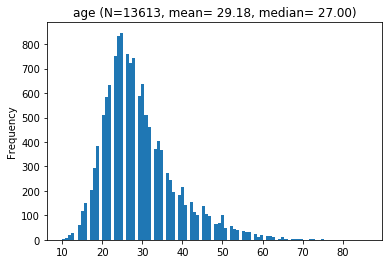

In [6]:
data["Age"].plot.hist(title='age (N=%d, mean= %0.2f, median= %.2f)'%(len(data), data["Age"].mean(), data["Age"].median()), bins= 100)

In [7]:
average_age= pd.DataFrame([{'Job': group,'N': len(data.loc[rows]), 'average_age':
                           data.loc[rows]['Age'].mean()} for group, rows in data.groupby('JobRoleInterest').groups.item()]).sortvalues

AttributeError: 'dict' object has no attribute 'item'

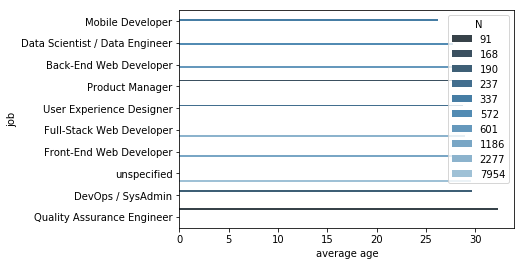

In [8]:
average_ages = pd.DataFrame([{
            'job': group,
            'N': len(data.loc[rows]),
            'average age': data.loc[rows]['Age'].mean()
        } for group, rows in data.groupby('JobRoleInterest').groups.items()]).sort_values(by='average age')
sns.barplot(data=average_ages, x='average age', y='job', hue='N', palette='Blues_d')

In [9]:
data.shape

(13613, 113)

In [10]:
average_ages

,job,N,average age
5,Mobile Developer,337,26.195846
1,Data Scientist / Data Engineer,572,27.720280
0,Back-End Web Developer,601,28.028286
6,Product Manager,168,28.166667
8,User Experience Designer,237,28.742616
4,Full-Stack Web Developer,2277,28.942468
3,Front-End Web Developer,1186,29.084317
9,unspecified,7954,29.559215
2,DevOps / SysAdmin,190,29.668421
7,Quality Assurance Engineer,91,32.362637


In [11]:
new_df= pd.DataFrame()
new_df["Average_age"]= data.groupby("JobRoleInterest").mean()["Age"].round(2)
new_df["N"]= data.groupby("JobRoleInterest").agg('count')["Age"]

In [12]:
new_df

,Average_age,N
JobRoleInterest,,
Back-End Web Developer,28.03,601
Data Scientist / Data Engineer,27.72,572
DevOps / SysAdmin,29.67,190
Front-End Web Developer,29.08,1186
Full-Stack Web Developer,28.94,2277
Mobile Developer,26.20,337
Product Manager,28.17,168
Quality Assurance Engineer,32.36,91
User Experience Designer,28.74,237


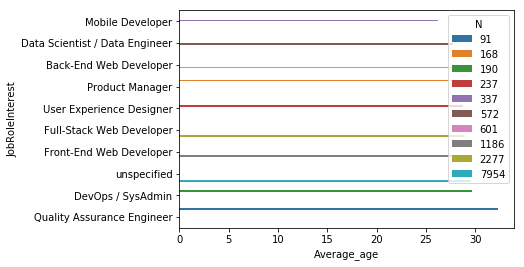

In [13]:
new_df= new_df.sort_values(by= 'Average_age')
sns.barplot(new_df.Average_age,new_df.index, hue= new_df.N)

In [14]:
new_df.sort_values(by= 'Average_age')

,Average_age,N
JobRoleInterest,,
Mobile Developer,26.20,337
Data Scientist / Data Engineer,27.72,572
Back-End Web Developer,28.03,601
Product Manager,28.17,168
User Experience Designer,28.74,237
Full-Stack Web Developer,28.94,2277
Front-End Web Developer,29.08,1186
unspecified,29.56,7954
DevOps / SysAdmin,29.67,190


In [15]:
data["Age"].mean()

29.17542055388232

In [16]:
average_job= new_df
qa = average_ages[average_ages['job'] == 'Quality Assurance Engineer'].iloc[0]
t_score = float(qa['average age'] - data['Age'].mean()) / (data['Age'].std() / np.sqrt(qa['N']))
degrees_of_freedom = qa['N'] - 1
p_value = 1 - scipy.stats.t(df=degrees_of_freedom).cdf(t_score)
print('The p-value is %d', p_value)

The p-value is %d 0.0005514593045721217


**Notes :**

* This number is quite small. It means that there’s less than tenth percent chance that the QA engineers mean age deviation from the total population’s mean age is due to chance. If we would have chosen a significance level of 0.01 — which is a common choice, we’d reject the null hypothesis.

**Method 2: Simulation**

* Statisticians like statistical tests. They are powerful, but they have two big disadvantages:
        * They impose assumptions on the data. In our case, the sample mean age isn’t really normal. It’s approximately normal, so the T test result is an approximation. Quite a good one though…
        * Sometimes they make you test something that is similar but not exactly what you wish for. In our case it’s not true: we were interested in the mean difference, and that’s exactly what the T test provides. If we wanted to test something more complicated with no classical statistical test for the use case, we’d be in trouble.

* To solve both problems, we can use simulations. We first calculate some statistic of the observed data — as was done before. Instead of calculating the probability to observe that statistic value, we simulate many experiments assuming the null hypothesis is true. We count the fraction of the experiments that yielded a statistic which is at least as extreme as the one we calculated before.

In [17]:
observed_diff = abs(qa['average age'] - data['Age'].mean())
num_of_simulations = 100000
num_of_extreme_values = sum(abs(data.sample(n=qa['N'])['Age'].mean() - data['Age'].mean()) >= observed_diff
                            for _ in range(num_of_simulations))
p_value = float(num_of_extreme_values) / num_of_simulations
print('The p-value is', p_value)

The p-value is 0.00082


**Final Note :**
* We got a similar result, but a little bit different. Note that the more simulations we run, the more exact the result will be (it’ll tend to the true p-value).
* Why does it differ from the T test approach? Because the T test assumes the data is normal, while it’s only approximately normal.